# Milestone 1 - Notebook 401 
## JR's Exploration of TMDB Data
### Notes:
- JR's TMDB API Key: 8c7d0bb785cb396ff84c3392e3baa7f9
- Working with tmdbsimple wrapper to obtain data (Check https://github.com/celiao/tmdbsimple/)
- Author of tmdbsimple has a library with a Rotten Tomatoes Wrapper (Check https://pypi.python.org/pypi/rtsimple)

### What this notebook does:
- Import the tmdbsimple package
- Obtain genre data for favorite movie
- Obtain list of 20 most popular movies of 2016
- Create dataframe with relevant characteristics of these movies
- Create dataframe of genre per movie
- Create and visualize dataframe of genre relative co-occurrance


In [1]:
# Import tmdbsimple wrapper
import tmdbsimple as tm
tm.API_KEY = '8c7d0bb785cb396ff84c3392e3baa7f9'

In [2]:
# Find Movie Code
search = tm.Search()
response = search.movie(query='Django Unchained')
for s in search.results:
    print(s['title'], s['id'])
    p = s['id']
    
# Obtain Genres for Django
django = tm.Movies(p).info()
print django['genres'][0]['name']
print django['genres'][1]['name']

(u'Django Unchained', 68718)
Drama
Western


In [3]:
# Obtain list of genre names
genre = tm.Genres()
response = genre.list()
g_codes = []
g_names = []
for s in genre.genres:
    g_codes = [g_codes, s['id']]
    g_names = [g_names, s['name']]

In [4]:
# Obtain most popular movies in 2016
discover = tm.Discover()
response = discover.movie(page = 1, year = 2016, 
                          sort_by = 'popularity.desc')
t = []
i = []
p = []
g = []
g_name = []
for s in discover.results:
    t.append(s['title'])
    i.append(s['id'])
    p.append(s['popularity'])
    g.append(s['genre_ids'])

    temp = []
    for k in s['genre_ids']:
        for j in genre.genres:
            if k == j['id']:
                temp.append(j['name'])
    g_name.append([temp])

In [5]:
# Produce Dataframe
import pandas as pd
data = pd.DataFrame(
    {'title': t,
     'id': i,
     'popularity': p,
     'genre_codes': g,
     'genre_names': g_name
    })

In [6]:
# Produce Movie/Genre Matrix
from sklearn.feature_extraction.text import CountVectorizer as CVect
data['genre_str'] = ''
for i in range(len(data)):
    data['genre_str'][i] = str(data['genre_names'][i])
vect = CVect()
corpus = data['genre_str'].values
x = vect.fit_transform(corpus)
x = x.toarray()
n = vect.get_feature_names()
l = len(n)
matrix = pd.DataFrame({})
for i in range(l):
    matrix[str(n[i])] = x[:,i]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# Produce Genre/Genre Matrices of Relative Co-ocurrences
import numpy as np
xt = np.transpose(x)
X = np.matmul(xt, x)

from __future__ import division
Xr = np.zeros((15,15))
Xc = np.zeros((15,15))
for i in range(15):
    for j in range(15):
        Xr[i,j] = X[i,j]/X[i,i]
        Xc[i,j] = X[i,j]/X[j,j]
Xt = (Xr + Xc) / float(2)

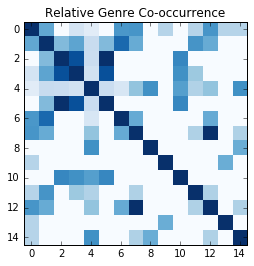

In [8]:
# Visualize Genre/Genre Matrix of Relative Co-occurrence 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(Xt, cmap='Blues', interpolation='nearest')
plt.title('Relative Genre Co-occurrence')
plt.show()

Highest relative co-occurrences of genres in 20 most popular movies of 2016 occur between:
- Science and Fiction
- Family and Animation
- Comedy and Animation
- Comedy and Family